In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import utils
import pandas as pd
import numpy as np
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import os
from PIL import Image
Image.MAX_IMAGE_PIXELS = 1000000000

/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
import keras
from keras.models import Sequential, Model, Input
from keras.layers import Dense, Dropout, Activation
from keras.layers import Conv2D, MaxPooling2D, Flatten
from keras.regularizers import l2
from keras.callbacks import ModelCheckpoint, TensorBoard
import h5py
from keras.models import load_model

In [3]:
train_data_path = '/home/ec2-user/Capstone_Project/code/left-pca16' # Full path should be given here 
train_mask_path = 'mask/train/'
test_data_path = '/home/ec2-user/Capstone_Project/code/right-pca16' # Full path should be given here 
test_mask_path = 'mask/test/'

## Visualize Masks

In [4]:
files = []
folder = 'mask/train/'
path = []
for filename in os.listdir('mask/train/'):
    files.append(filename)
    path.append('{}{}'.format(folder,filename))

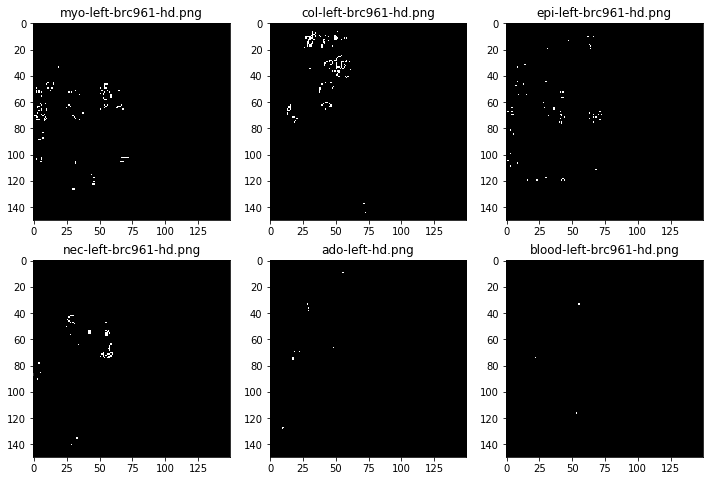

In [5]:
fig, axs = plt.subplots(2, 3, figsize=(12, 8))
axs = axs.ravel()
for i in range(len(path)):
    img = load_img(path=path[i],grayscale=True, target_size=(150,150), interpolation='nearest')
    axs[i].imshow(img)
    axs[i].set_title(files[i])

In [6]:
files = []
folder = 'mask/test/'
path = []
for filename in os.listdir('mask/test/'):
    files.append(filename)
    path.append('{}{}'.format(folder,filename))

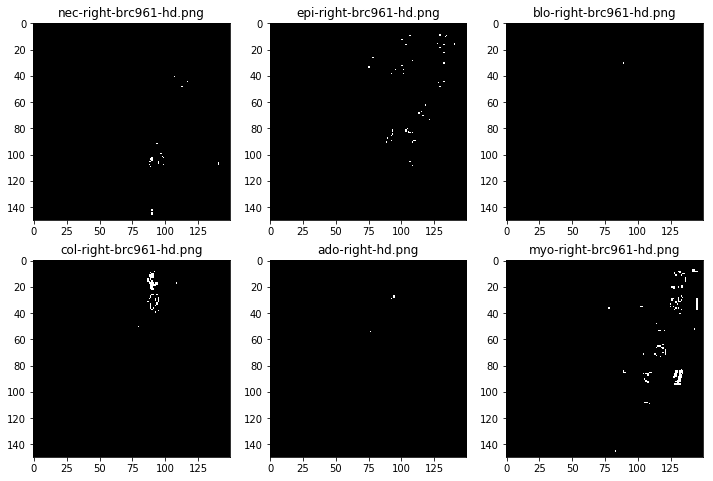

In [7]:
fig, axs = plt.subplots(2, 3, figsize=(12, 8))
axs = axs.ravel()
for i in range(len(path)):
    img = load_img(path=path[i],grayscale=True, target_size=(150,150), interpolation='nearest')
    axs[i].imshow(img)
    axs[i].set_title(files[i])

In [8]:
# Read data form training and test 

In [9]:
X_train,Y_train, num_bands = utils.load_data(data_path = train_data_path, 
                                             masks_path = train_mask_path, 
                                             crop_size = 33, 
                                             num_classes = 6, 
                                             samples = 1000, 
                                             balance = True)

In [10]:
X_test,Y_test, num_bands = utils.load_data(data_path = test_data_path, 
                                           masks_path = test_mask_path, 
                                           crop_size = 33, 
                                           num_classes = 6, 
                                           samples = 1000, 
                                           balance = True)

In [11]:
# creat generato

In [12]:
print(type(X_train), type(Y_train))
print(X_train.shape, Y_train.shape, num_bands)
print(X_test.shape,  Y_test.shape,  num_bands)

<class 'numpy.ndarray'> <class 'numpy.ndarray'>
(5999, 33, 33, 16) (5999, 6) 16
(6000, 33, 33, 16) (6000, 6) 16


In [13]:
X_train = np.array([X_train[i] for i in range(X_train.shape[0])])

In [14]:
X_test = np.array([X_test[i] for i in range(X_test.shape[0])])

In [15]:
Y_train = np.array([Y_train[i,:] for i in range(Y_train.shape[0])])

In [16]:
Y_test = np.array([Y_test[i,:] for i in range(Y_test.shape[0])])

# Build First Model

In [17]:
# model = Sequential()
# model.add(Conv2D(32, (3, 3), input_shape=(33, 33, 16)))
# model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))

# model.add(Conv2D(32, (3, 3)))
# model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))

# model.add(Conv2D(64, (3, 3)))
# model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))

# model.add(Flatten())
# model.add(Dense(64))
# model.add(Activation('relu'))
# model.add(Dropout(0.5))
# model.add(Dense(6))
# model.add(Activation('softmax'))

model = Sequential()
model.add(Conv2D(filters=8, kernel_size=(5, 5), strides=(1, 1),
                 activation='relu',
                 input_shape=(33, 33, 16),
                 kernel_regularizer=l2(0.01)))

model.add(MaxPooling2D(pool_size=(2, 2),
                       strides=(2, 2)))

model.add(Conv2D(filters=32, kernel_size=(5, 5),
                 strides=(1, 1),
                 activation='relu',
                 kernel_regularizer=l2(0.01)))

model.add(MaxPooling2D(pool_size=(2, 2),
                       strides=(2, 2)))
model.add(Flatten())
model.add(Dense(128,
                activation='relu',
                kernel_regularizer=l2(0.01)))
model.add(Dense(6,
                activation='softmax',
                kernel_regularizer=l2(0.01)))

In [18]:
filepath="Model_1_best.h5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
tbCallBack = TensorBoard(log_dir='./logs', histogram_freq=0, write_graph=True, write_images=True)
#callbacks_list = [checkpoint,tbCallBack]

In [19]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(lr=0.001),
              metrics=['accuracy'])

In [20]:
hist = model.fit(X_train, Y_train,
          epochs = 30,
          verbose = 1,
          batch_size= 50,
          validation_data=(X_test, Y_test),
          callbacks = [tbCallBack] )

Train on 5999 samples, validate on 6000 samples
Epoch 1/30
5999/5999 [==============================] - 5s 793us/step - loss: 1.8709 - acc: 0.8103 - val_loss: 1.5649 - val_acc: 0.6922
Epoch 2/30
5999/5999 [==============================] - 2s 314us/step - loss: 0.8308 - acc: 0.8943 - val_loss: 1.6814 - val_acc: 0.6092
Epoch 3/30
5999/5999 [==============================] - 2s 313us/step - loss: 0.5950 - acc: 0.9153 - val_loss: 1.2187 - val_acc: 0.6818
Epoch 4/30
5999/5999 [==============================] - 2s 310us/step - loss: 0.5081 - acc: 0.9175 - val_loss: 1.1459 - val_acc: 0.6608
Epoch 5/30
5999/5999 [==============================] - 2s 311us/step - loss: 0.4601 - acc: 0.9218 - val_loss: 1.2525 - val_acc: 0.6712
Epoch 6/30
5999/5999 [==============================] - 2s 312us/step - loss: 0.4146 - acc: 0.9318 - val_loss: 1.0520 - val_acc: 0.7132
Epoch 7/30
5999/5999 [==============================] - 2s 310us/step - loss: 0.4039 - acc: 0.9275 - val_loss: 1.1548 - val_acc: 0.7642


In [25]:
model = load_model('Model_1_best.h5')

In [26]:
# this make aure all the layers are trainable
for layer in model.layers:
    print(layer.trainable,layer.name)

True conv2d_1
True max_pooling2d_1
True conv2d_2
True max_pooling2d_2
True flatten_1
True dense_1
True dense_2


In [28]:
loss = hist.history['loss']
val_loss = hist.history['val_loss']
acc = hist.history['acc']
val_acc = hist.history['val_acc']
num_epocs = np.arange(len(loss))

Text(0,0.5,'accuracy')

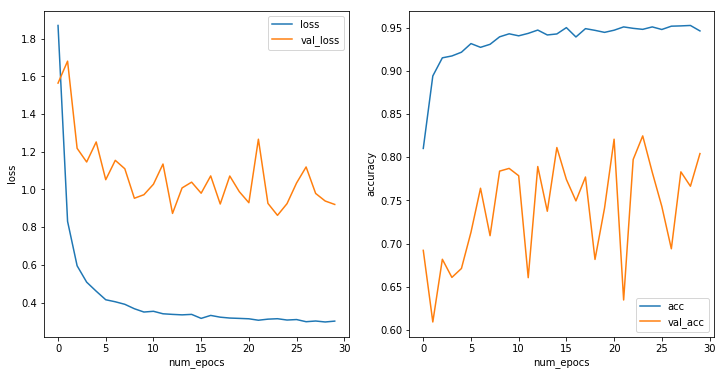

In [46]:
fig,axs = plt.subplots(1,2,figsize=(12, 6))
axs = axs.ravel()
axs[0].plot(num_epocs,loss, label='loss')
axs[0].plot(num_epocs,val_loss, label='val_loss')
axs[0].legend()
axs[0].set_xlabel('num_epocs')
axs[0].set_ylabel('loss')



axs[1].plot(num_epocs,acc, label='acc')
axs[1].plot(num_epocs,val_acc,label='val_acc')
axs[1].legend()
axs[1].set_xlabel('num_epocs')
axs[1].set_ylabel('accuracy')